In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
#read in median distances for pairwise interactions (obtained from analysis of the pdb)
directory='/Users/weilu/opt/gremlin/'
distancesCACB=pd.read_table(directory+'CACBmediandist.dat', delim_whitespace=True, header=None)
distancesCACA=pd.read_table(directory+'CACAmediandist.dat', delim_whitespace=True, header=None)
distancesCBCB=pd.read_table(directory+'CBCBmediandist.dat', delim_whitespace=True, header=None)
distancesCACB.columns = ['i', 'j', 'dist']
distancesCACA.columns = ['i', 'j', 'dist']
distancesCBCB.columns = ['i', 'j', 'dist']
#if you want to filter the gremlin data, adjust the parameters below
filter_threshold=0.1
column=6
name='gremlin'

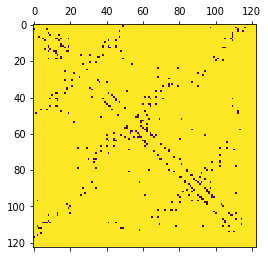

In [3]:
#make sure that there is a sequence file for the protein and the downloaded gremlin data in the proper directories

# pdbID='2bg9'
pdbID='1j4n'
directory = "/Users/weilu/opt/gremlin/protein/" + pdbID + "/"
f = open(directory+pdbID+".seq","r")
n=len(f.readlines()[0].strip())
f.close()
#load downloaded gremlin file
gremlin_data=np.loadtxt(directory+"gremlin."+pdbID+".dat", dtype=bytes, skiprows=1)
rnative_matrixCACB=np.ones([n,n])*99
rnative_matrixCACA=np.ones([n,n])*99
rnative_matrixCBCB=np.ones([n,n])*99
for pair in gremlin_data:
    i=int(pair[0])
    j=int(pair[1])
    irestype=pair[2][-1:].decode()
    jrestype=pair[3][-1:].decode()
#     print(irestype, jrestype)
    if float(pair[column]) > filter_threshold:
        if sum((distancesCACB['i']==irestype)&(distancesCACB['j']==jrestype))>0: #check if pair is in correct order
            well_centerCACB = distancesCACB[(distancesCACB['i']==irestype)&(distancesCACB['j']==jrestype)]['dist'].values[0]
            well_centerCACA = distancesCACA[(distancesCACA['i']==irestype)&(distancesCACA['j']==jrestype)]['dist'].values[0]
            well_centerCBCB = distancesCBCB[(distancesCBCB['i']==irestype)&(distancesCBCB['j']==jrestype)]['dist'].values[0]            
        else:
            well_centerCACB = distancesCACB[(distancesCACB['i']==jrestype)&(distancesCACB['j']==irestype)]['dist'].values[0]
            well_centerCACA = distancesCACA[(distancesCACA['i']==jrestype)&(distancesCACA['j']==irestype)]['dist'].values[0]
            well_centerCBCB = distancesCBCB[(distancesCBCB['i']==jrestype)&(distancesCBCB['j']==irestype)]['dist'].values[0]

        rnative_matrixCACB[i-1, j-1] = well_centerCACB
        rnative_matrixCACB[j-1, i-1] = well_centerCACB
        rnative_matrixCACA[i-1, j-1] = well_centerCACA
        rnative_matrixCACA[j-1, i-1] = well_centerCACA
        rnative_matrixCBCB[i-1, j-1] = well_centerCBCB
        rnative_matrixCBCB[j-1, i-1] = well_centerCBCB
        
plt.matshow(rnative_matrixCACA)

directory = "/Users/weilu/opt/gremlin/protein/" + pdbID + "/gremlin/"
os.system("mkdir " + directory)
np.savetxt(directory + 'go_rnativeCACB.dat', rnative_matrixCACB, fmt='%10.5f')
np.savetxt(directory + 'go_rnativeCACA.dat', rnative_matrixCACA, fmt='%10.5f')
np.savetxt(directory + 'go_rnativeCBCB.dat', rnative_matrixCBCB, fmt='%10.5f')